In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from aicsimageio import AICSImage
import pyvips

In [3]:
img = AICSImage("/home/d/Downloads/W409B (Aged) Series 1, 2, & 3.czi")

In [4]:
img.dims

<Dimensions [T: 1, C: 1, Z: 1, Y: 20908, X: 20408, S: 3]>

In [12]:
img.channel_names

['TL Brightfield']

In [13]:
img.current_scene

'TR3'

In [14]:
img.current_scene_index

0

In [18]:
img.physical_pixel_sizes

PhysicalPixelSizes(Z=None, Y=0.454, X=0.454)

In [32]:
img.scenes

('TR3', 'TR1', 'TR2')

In [23]:
stack = img.get_stack(select_scenes=[0])

In [25]:
stack.shape

(1, 1, 1, 1, 20908, 20408, 3)

In [26]:
stack = img.get_stack(select_scenes=[1])

In [27]:
stack.shape

(1, 1, 1, 1, 22216, 18650, 3)

In [28]:
stack = img.get_stack(select_scenes=[2])

In [29]:
stack.shape

(1, 1, 1, 1, 22218, 18473, 3)

In [ ]:
img.get_image_data()

In [31]:
imshow( img.get_image_data("ZYX", C=0, S=[0,1,2], T=0) )

ConflictingArgumentsError: When selecting a multiple dimension indices, the specified dimension must be provided in return_dims. return_dims=ZYX, dimension S = [0, 1, 2]

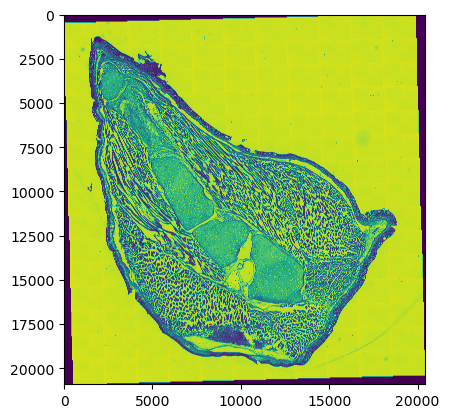

In [6]:
imshow( img.get_image_data("YX", C=0, S=1, T=0) )

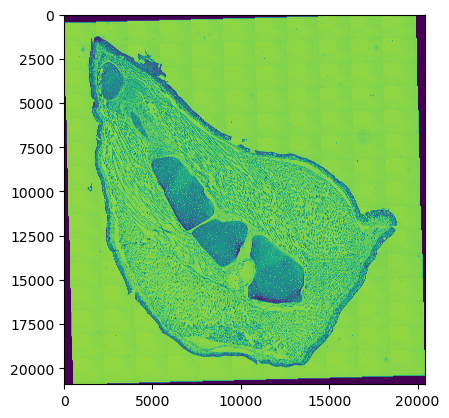

In [7]:
imshow( img.get_image_data("YX", C=0, S=2, T=0) )

In [8]:
#
# combine the 3 scans to one image
#
r = img.get_image_data("YX", C=0, S=0, T=0).astype(float)
r /= r.max()
r *= 255
r = r.astype(np.uint8)
g = img.get_image_data("YX", C=0, S=1, T=0).astype(float)
g /= g.max()
g *= 255
g = g.astype(np.uint8)
b = img.get_image_data("YX", C=0, S=2, T=0).astype(float)
b /= b.max()
b *= 255
b = b.astype(np.uint8)

In [9]:
arr = np.stack((b,g,r), axis=-1)

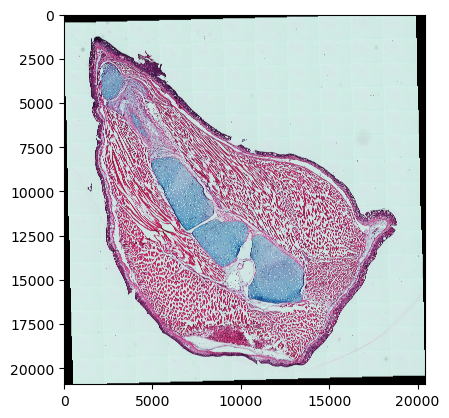

In [10]:
imshow(arr)

In [11]:
vips_img = pyvips.Image.new_from_array(arr)
vips_img.dzsave('web/axo')